# Proyecto análisis exploratorio de datos Airbnb Nueva York

En este proyecto vamos a realizar un análisis exploratorio de datos sobre la información que tenemos de los alojamientos que proporciona Airbnb en la ciudad de Nueva York.

 ## Planteamiento del problema, objetivo y recopilación de datos 

Una vez visualizado el contenido del data set que disponemos podemos proponer diversos objetivos, tales como predecir el precio del inmueble por noche según sus características, clasificar si un será o no popular en función de sus características o detectar anomalías en los precios, entre otros.
En nuestro caso vamos a intentar construir un modelo de clasificación y analizar qué variables explican mejor la popularidad, respondiendo a la siguiente pregunta:
> *¿Qué factores predicen que un alojamiento tenga una alta demanda?*  

Esta cuestión podría ser de ayuda a los anfitriones a mejorar sus propiedades o detectar patrones de éxito.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

airbnb_data = pd.read_csv("../data/raw/airbnb_ny.csv")
#airbnb_data.drop(columns=["index"], inplace=True)
airbnb_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## Análisis descriptivo
Ya cargados los datos los analizamos completamente para obtener conclusiones que nos lleven a nuestro objetivo. Leemos el dataset y mostramos una vista general del dataset:

* Dimensiones del dataset, el cual nos indica que tenemos 48895 filas y 16 columnas:

In [2]:
airbnb_data.shape

(48895, 16)

* Obtener información sobre tipos de datos y valores no nulos

In [3]:
airbnb_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

* Describir los principales indicadores estadisticos de las variables

In [ ]:
airbnb_data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,48895.0,1.901714e+07,1.098311e+07,2539.00000,9.471945e+06,1.967728e+07,2.915218e+07,3.648724e+07
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,38843.0,1.373221e+00,1.680442e+00,0.01000,1.900000e-01,7.200000e-01,2.020000e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


Antes de proceder comprobaremos si tenemos duplicados.



In [25]:
airbnb_data.duplicated().sum()

np.int64(0)

## Analisis de variables

Despues de analizar lo que nos aporta el dataset, tenemos 48895 filas y 16 columnas, de las cuales podemos sacar la siguiente información para el análisis de las variables de nuestro objetivo (target). Las iremos analizando paso a paso y actuaremos en consecuencia sobre ellas.

| **Variable**                    | **Qué indica**                                  | **Por qué importa**                                                                                      |
|-------------------------------|--------------------------------------------------|-----------------------------------------------------------------------------------------------------------|
| `id`                          | Identificación del inmueble                      | No importa                                                                                                 |
| `name`                        | Breve descripción                                | Valorar                                                                                                    |
| `host_id`                     | Identificación del anfitrión                     | Valorar                                                                                                    |
| `host_name`                  | Nombre del anfitrión                             | No importa                                                                                                 |
| `neighbourhood_group`        | Ubicación general                                | Zonas céntricas o turísticas atraen más huéspedes                                                         |
| `neighbourhood`              | Barrio específico                                | Agrupar por popularidad                                                                                   |
| `latitude` / `longitude`     | Coordenadas geográficas                          | Agrupar por zonas. Útiles para mapas de calor                                                             |
| `room_type`                  | Tipo de alojamiento                              | Determina demanda y disponibilidad                                                                        |
| `price`                      | Precio por día                                   | Correlacionar con ubicación, tipo de habitación y popularidad. Los alojamientos populares suelen tener precios competitivos o bien ajustados |
| `minimum_nights`             | Requisito de estancia                            | Estancias flexibles atraen más huéspedes                                                                  |
| `number_of_reviews`          | Total de reseñas históricas                      | Muestra trayectoria y confianza                                                                           |
| `last_review`                | Última reseña                                    | Se puede transformar en "antigüedad" del anuncio                                                          |
| `reviews_per_month`          | Frecuencia de reservas por mes                   | Refleja actividad y buena rotación                                                                        |
| `calculated_host_listings_count` | Cantidad de propiedades del anfitrión      | Los anfitriones profesionales suelen optimizar mejor su ocupación                                         |
| `availability_365`           | Días disponibles al año                          | Tiene demasiados valores no determinantes                                                                 |


Comentarios del análisis de las variables:

- `id`: identificador del alojamiento, no tiene valor analítico, **eliminamos**.
- `name`: en principio no aporta nada a nuestro EDA, **eliminamos**.
- `host_id`: identificador único del anfitrión, podría servirnos para agrupar alojamientos por anfitrión o valorar si los anfitriones con más propiedades tienden a tener más reservas. Pero esta información ya la tenemos en la variable `calculated_host_listings_count`, **eliminamos**.
- `host_name`: nombre del anfitrión, no nos resulta útil dara nuestro análisis, **eliminamos**.
- `neighbourhood_group`: agrupa zonas grandes de Nueva York, la ubicación es un factor clave de popularidad, nos va a permitir comparar precios, demanda y/o frecuencia de reservas,**discreta**.
- `neighbourhood`: da mas detalle geográfico que `neighbourhood_group`, puede ser útil para nalizar precios y demandas entre barrios y realizar mapas, por el momento la conservaremos, es **discreta** pero tiene muchas categorias. 
- `latitude`/`longitude` son coordenadas exactas de cada alojamiento, nos permitiran crear mapas de calor, **continua**.
- `room_type` esta variable influye directamente en el precio, ocupación y en la popularidad, nos detendremos a analizarla más detalladamente para poder hacer comprarciones y realizar "one-hot encoding",**discreta**.
- `price`precio por noche, el precio varia aleatoriamente según ubicación, tipo, se pueden hacer relaciones de precio medio por `room_type` o por `neighbourhood_group`. Revisar que no tengan valor 0. **continua**
- `minimum_nights` mínimo de noches que se pueden reservar. Los anuncios con estancias mínimas muy altas suelen recibir menos reservas, los de de menos suelen ser más populares, sobre todo en zonas turísticas, analizar la relación con `price` y `reviews_per_month`,**discreta**
- `number_of_reviews` histórico de reseñas del alojamiento. Mayor numero de reseñas indicará mayor visibilidad, menos reseñas alojamientos nuevos o con baja demanda (analizar). Comprobar relación con `price`, 'reviews_per_month' o `neighbourhood_group`, **discreta**
- `last_review`fecha de la última reseña registrada, es una variable temporal, se puede transformar para obtener la antigüedad desde la última reseña (analizar), se pueden ver tendencias recientes o anuncios inactivos.
- `reviews_per_month` valor medio de reseñas que recibe un alojamiento por mes, puede ser nuesrtra variable objetivo. Graficar su distribución con `price` y `neighbourhood_group`, es una buena indicadora de demanda.**continua**
- `calculated_host_listings_count` número de alojamientos que gestiona un mismo anfitrión. Se puede relacionar con `reviews_per_month` o `number_of_reviews` para ver si los profesionales obtienen más reservas. Podríamos crear categorías para ver el nivel de profesionlidad de los anfitriones, **discreta**.
- `availability_365` es el número de dias que esta dispponible el alojamiento durante el año. Hay que tener en cuenta que una alta disponibilidad alta no necesariamente significa que el alojamiento se impopular, hay anfitriones que bloquean fechas por decisión própia.  **discreta**. 






>Descartamos las variables no necesarias:

In [ ]:
airbnb_data.drop(["id", "name","host_id","host_name"], axis = 1, inplace=True)
airbnb_data

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,days_since_last_review
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,2582.0
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,2368.0
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365,0.0
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,2323.0
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,2551.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaT,NaN,2,9,0.0
48891,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaT,NaN,2,36,0.0
48892,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaT,NaN,1,27,0.0
48893,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaT,NaN,6,2,0.0


>Vamos a convertir `last_review` (fecha) en una señal de actividad reciente en nuestro modelo creando una nueva variable `days_since_last_review` que indicará los días desde la última reseña para visualizar fácilmente la la antigüedad. Los alojamientos que no tienen reseñas quedarán con NaN, los reemplazaremos con 0. 

In [ ]:
#convertimos en fecha ya que es un object(texto)
airbnb_data['last_review'] = pd.to_datetime(airbnb_data['last_review'])
airbnb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   neighbourhood_group             48895 non-null  object        
 1   neighbourhood                   48895 non-null  object        
 2   latitude                        48895 non-null  float64       
 3   longitude                       48895 non-null  float64       
 4   room_type                       48895 non-null  object        
 5   price                           48895 non-null  int64         
 6   minimum_nights                  48895 non-null  int64         
 7   number_of_reviews               48895 non-null  int64         
 8   last_review                     38843 non-null  datetime64[ns]
 9   reviews_per_month               38843 non-null  float64       
 10  calculated_host_listings_count  48895 non-null  int64         
 11  av

In [ ]:
airbnb_data['days_since_last_review'] = (pd.Timestamp.today() - airbnb_data['last_review']).dt.days
airbnb_data['days_since_last_review'].fillna(0, inplace=True)
airbnb_data.head()

/tmp/ipykernel_975/509305271.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  airbnb_data['days_since_last_review'].fillna(0, inplace=True)


,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,days_since_last_review
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365,2582.0
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,2368.0
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1,365,0.0
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,2323.0
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,2551.0


>ya qu esta variable nos dará contexto a nuestra variable objetivo `reviews_per_month` vamos a ver como son sus métricas y un histograma que nos ayude a entender la actividad actividad de los alojamientos

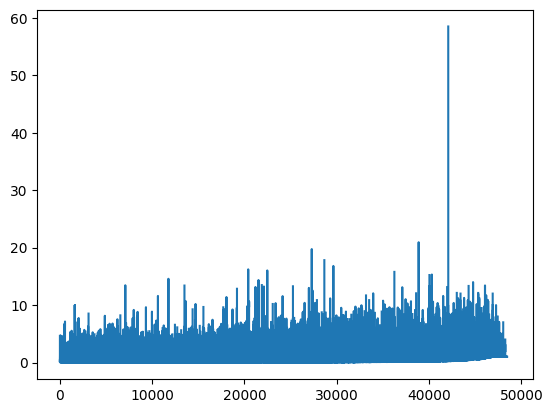

In [36]:

airbnb_data['reviews_per_month'].plot()

plt.show()


In [ ]:
airbnb_data['days_since_last_review'].describe()

count    48895.000000
mean      2063.040679
std       1112.453580
min          0.000000
25%       2324.000000
50%       2344.000000
75%       2566.000000
max       5344.000000
Name: days_since_last_review, dtype: float64

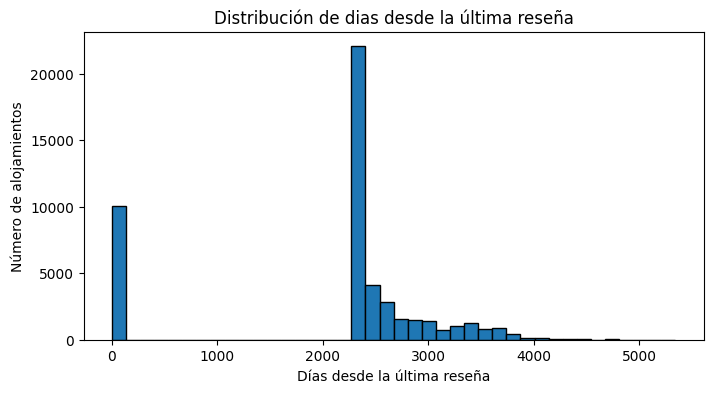

In [ ]:
plt.figure(figsize=(8,4))
plt.hist(airbnb_data['days_since_last_review'],bins=40, edgecolor='black')
plt.title('Distribución de dias desde la última reseña')
plt.xlabel('Días desde la última reseña')
plt.ylabel('Número de alojamientos')
plt.show()

>Viendo el gráfico podemos comprobar un pico grande en 0, son anuncios inactivos o sin historial reciente. Entre 200 y 3000 días nos indica que hay anuncios que no reciben reseñas nuevas desde hace año, así que podemos ver que hay pocos anuncios con alojamientos activos. 
Vamos a hacer una correlación entre reseñas por mes y dias desde la última reseña.

In [ ]:
airbnb_data[['reviews_per_month', 'days_since_last_review']].corr()

,reviews_per_month,days_since_last_review
reviews_per_month,1.000000,-0.441489
days_since_last_review,-0.441489,1.000000


Podemos ver una relación inversa, cuantos más dias desde la última reseña menos reseñas tenemos al mes, algo completamente normal. Vamos a ver un mapa de calor con las variables numericas que tenemos para ver que variables influyen mas en nuestra variable objetivo 

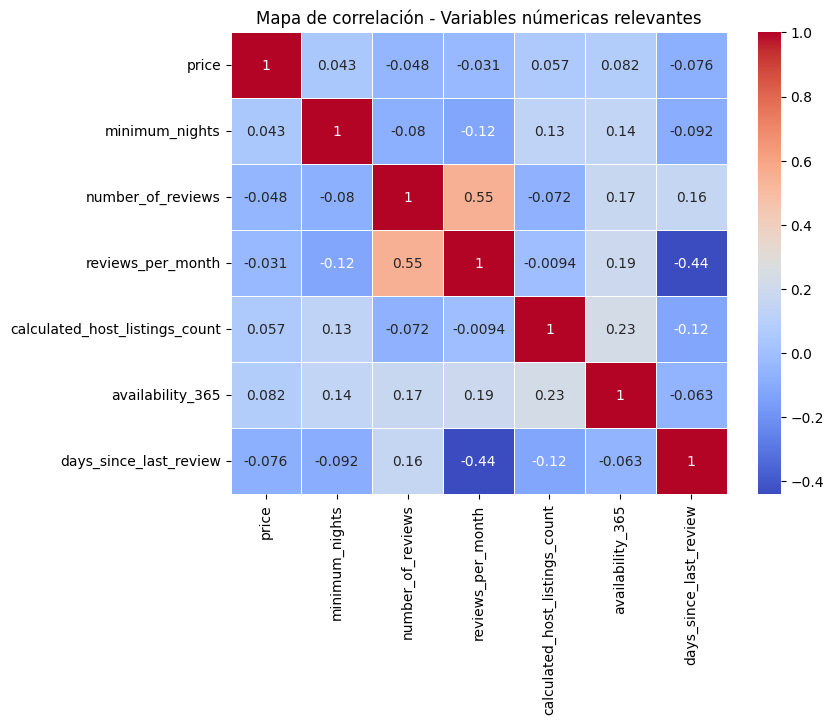

In [ ]:
vars_corr_numericas = [
    'price',
    'minimum_nights',
    'number_of_reviews',
    'reviews_per_month',
    'calculated_host_listings_count',
    'availability_365',
    'days_since_last_review'
]
correlaciones = airbnb_data[vars_corr_numericas]
matriz = correlaciones.corr()
plt.figure(figsize=(8,6))
sns.heatmap(matriz,annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Mapa de correlación - Variables númericas relevantes')
plt.show()

>Podemos destacar que nuestra variable objetivo tiene una fuerte realción positiva con `number_of_reviews`, los que tienen más reseñas históricas tambien tienen más actividad reciente.  
Vamos a ver ahora la relación que hay con las variables categoricas, Las categóricas clave de nuestro dataset y que influyen en nuestro target son `neighbourhood_group` y `room_type`. Realizamos un gráfico para ver si el tipo de alojamiento cambia la frecuencia de reseñas:

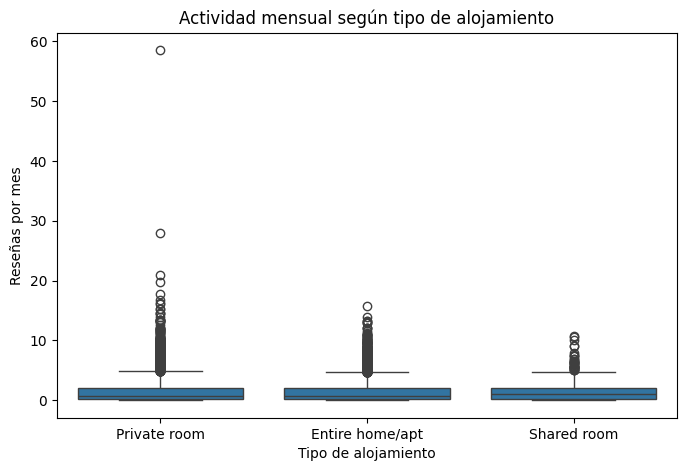

In [ ]:
plt.figure(figsize =(8,5))
sns.boxplot(data=airbnb_data, x='room_type', y='reviews_per_month')
plt.title('Actividad mensual según tipo de alojamiento')
plt.xlabel('Tipo de alojamiento')
plt.ylabel('Reseñas por mes')
plt.show()

>Ahora compararemos la actividad por zona:

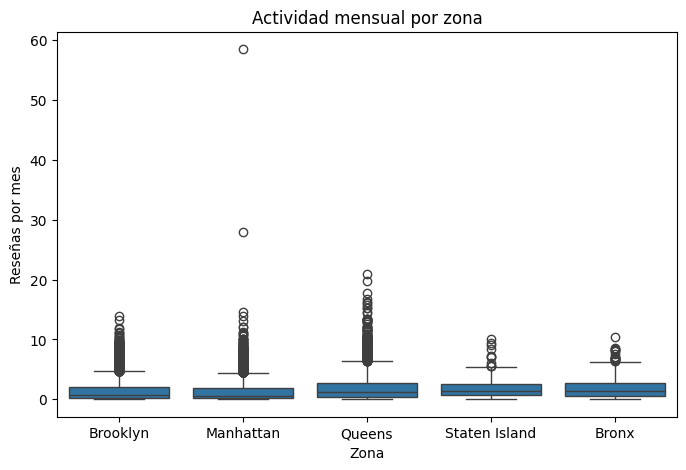

In [ ]:
plt.figure(figsize =(8,5))
sns.boxplot(data=airbnb_data, x='neighbourhood_group', y='reviews_per_month')
plt.title('Actividad mensual por zona')
plt.xlabel('Zona')
plt.ylabel('Reseñas por mes')
plt.show()

>En los gráficos podemos ver que tenemos outliers que pueden distorsionar nuestros datos, valoraremos en un futuro si debemos normalizarlos o que hacer con ellos.  
Vamos a ver ahora un analisis de las variables mas relevantes para nuestro modelo, tanto categóricas como númericas:

### Categóricas

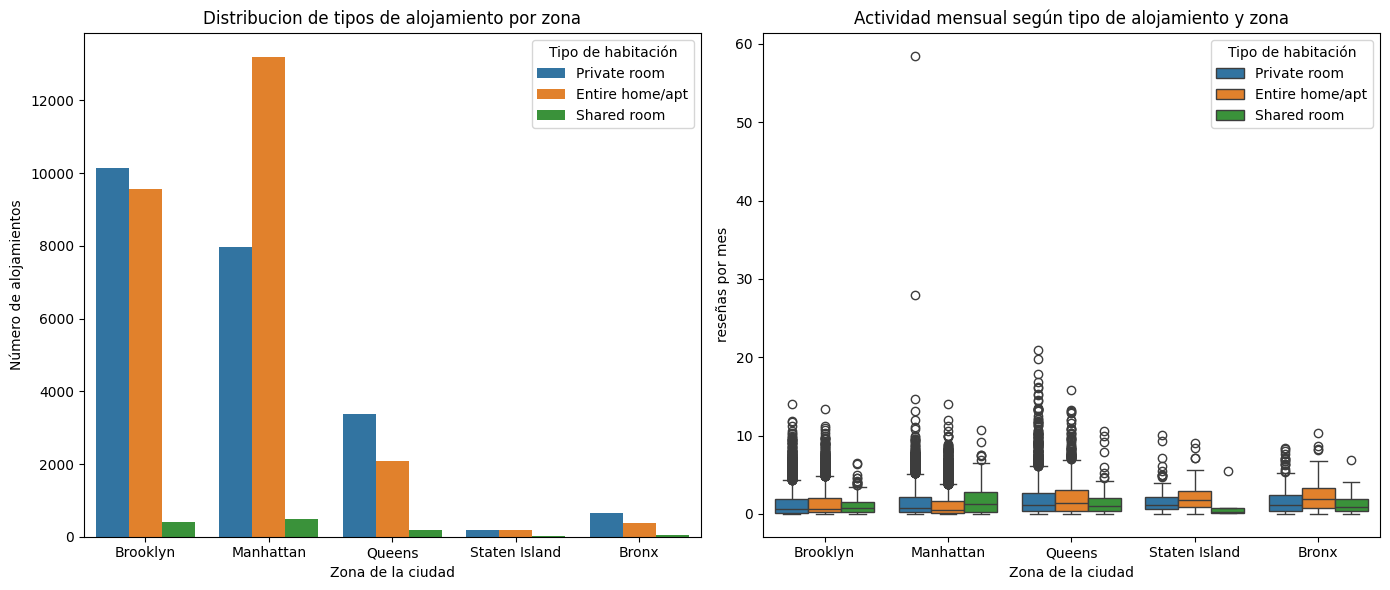

In [15]:
#Zona general
fig, axis = plt.subplots (1, 2, figsize=(14, 6))

#histograma zona y tipo de alojamiento
sns.countplot(data=airbnb_data, x='neighbourhood_group', hue='room_type', ax=axis[0])
axis[0].set_title('Distribucion de tipos de alojamiento por zona')
axis[0].set_xlabel('Zona de la ciudad')
axis[0].set_ylabel('Número de alojamientos')
axis[0].legend(title='Tipo de habitación')

#boxplot actividad zona y tipo
sns.boxplot(data=airbnb_data, x='neighbourhood_group', y='reviews_per_month', hue='room_type', ax=axis[1])
axis[1].set_title('Actividad mensual según tipo de alojamiento y zona')
axis[1].set_xlabel('Zona de la ciudad')
axis[1].set_ylabel('reseñas por mes')
axis[1].legend(title='Tipo de habitación')

plt.tight_layout()
plt.show()


>En este gráfico tenemos una visión clara de como se distribuye la oferta en Nueva York.  
En el panel izquierdo podemos ver que Brooklyn y Manhattan concentran casi toda la oferta. En Mahattan predominan los apartamentos completos, mientras que en Brooklyn casi se igualan con las habitaciones privadas. En el resto encontramos poca presencia de alojamientos comparado con los dos principales aunque predominan las habitaciones privadas.  
En el panel de la derecha se muestran las reseñas mensuales por zona y tipo. Podemos ver las medianas similares en todaas ellas, aunque podemos ver valores atípicos en en Manhattan, Brooklyn y Queens que indican habitaciones privadas extremadamente activas.  
En resumen, por zonas, Manhattan y Brooklyn dominan la oferta. Por tipo las habitaciones privadas presentan más actividad.

Vamos a inspeccionar ahora los 10 barrios con mas alojamientos ya que esta variable es discreta pero tiene demasiados valores. Intentaremos ver la oferta y actividad en los 10 principales barrios con más alojamientos disponibles.

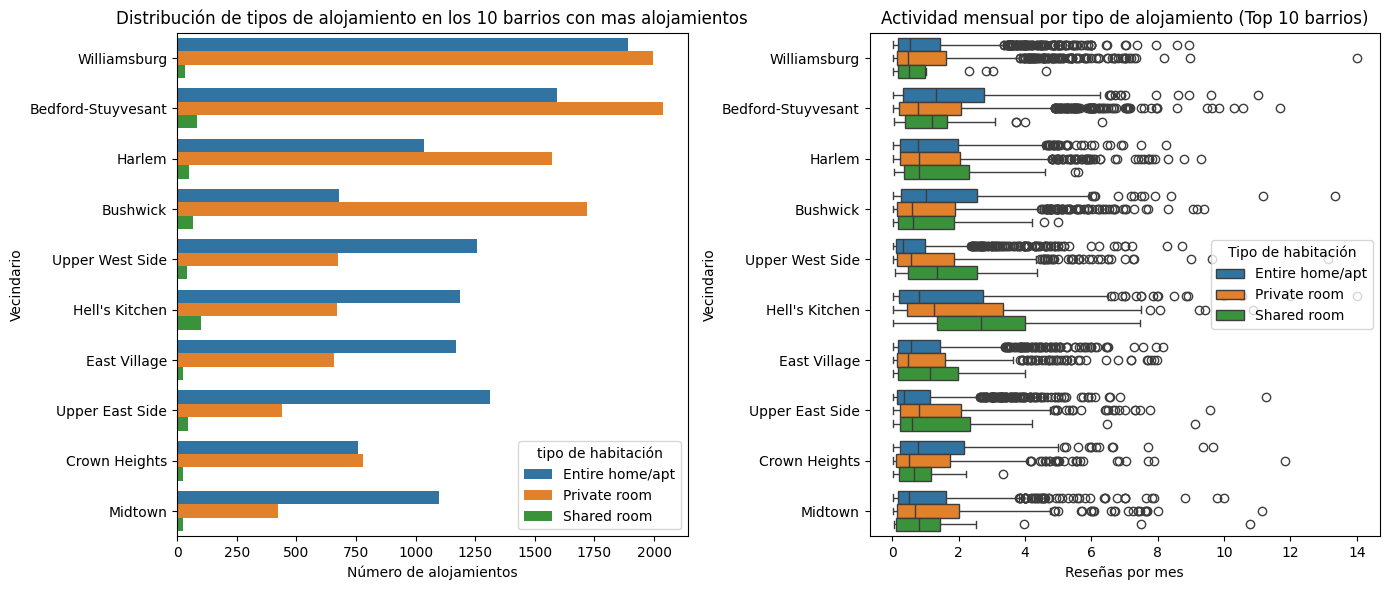

In [16]:
#lista con mayor numero de alojamientos registrados
top_10_neighbourhood = airbnb_data['neighbourhood'].value_counts().head(10).index
#booleano que filtra esos resultado para analizarlos
subdf = airbnb_data[airbnb_data['neighbourhood'].isin(top_10_neighbourhood)]

fig, axis = plt.subplots(1, 2, figsize=(14, 6))

#histograma oferta de vecindario por tipo de alojamiento
sns.countplot(data=subdf, y='neighbourhood', hue='room_type', order=top_10_neighbourhood, ax=axis[0])
axis[0].set_title('Distribución de tipos de alojamiento en los 10 barrios con mas alojamientos')
axis[0].set_xlabel('Número de alojamientos')
axis[0].set_ylabel('Vecindario')
axis[0].legend(title='tipo de habitación')

#boxplot(actividad media por barrio y tipo)
sns.boxplot(data=subdf, y='neighbourhood', x='reviews_per_month', hue='room_type', order=top_10_neighbourhood, ax=axis[1])
axis[1].set_title('Actividad mensual por tipo de alojamiento (Top 10 barrios)')
axis[1].set_xlabel('Reseñas por mes')
axis[1].set_ylabel('Vecindario')
axis[1].legend(title='Tipo de habitación')

plt.tight_layout()
plt.show()

>Podemos ver en el gráfico de la izquierda que los barrios de Williamsburg, Bedford-Stuybesant y Harlem son los que tienen más alojamientos, además también podemos ver que dominan los apartamentos completos en todo el gráfico y los verdes, habitaciones compartidas, son muy escasos en comparación, esto podría denotar especialización de los anfitriones.  
Por otra parte, en el panel de la derecha nos encontramos que las habitaciones privadas tienen una mediana de reseñas mensuales ligeramente superior y muchos valores atípicos generalizados en todo el panello que nos indica alojamientos muy activos, en general todos tienen menos de 2 reseñas/mes.  
En resumidas cuentas, los barrios con más ofertas no son necesariamente los más activos, y sobre los tipos de alojamiento parece que en las habitaciones privadas hay más movimiento.      
Pasamos ahora a analizar las variables númericas.

  

### Númericas

Vamos a analizar como se distribruyen las principales variables númericas y si presentan valores atípicos que podrían afectar al modelo

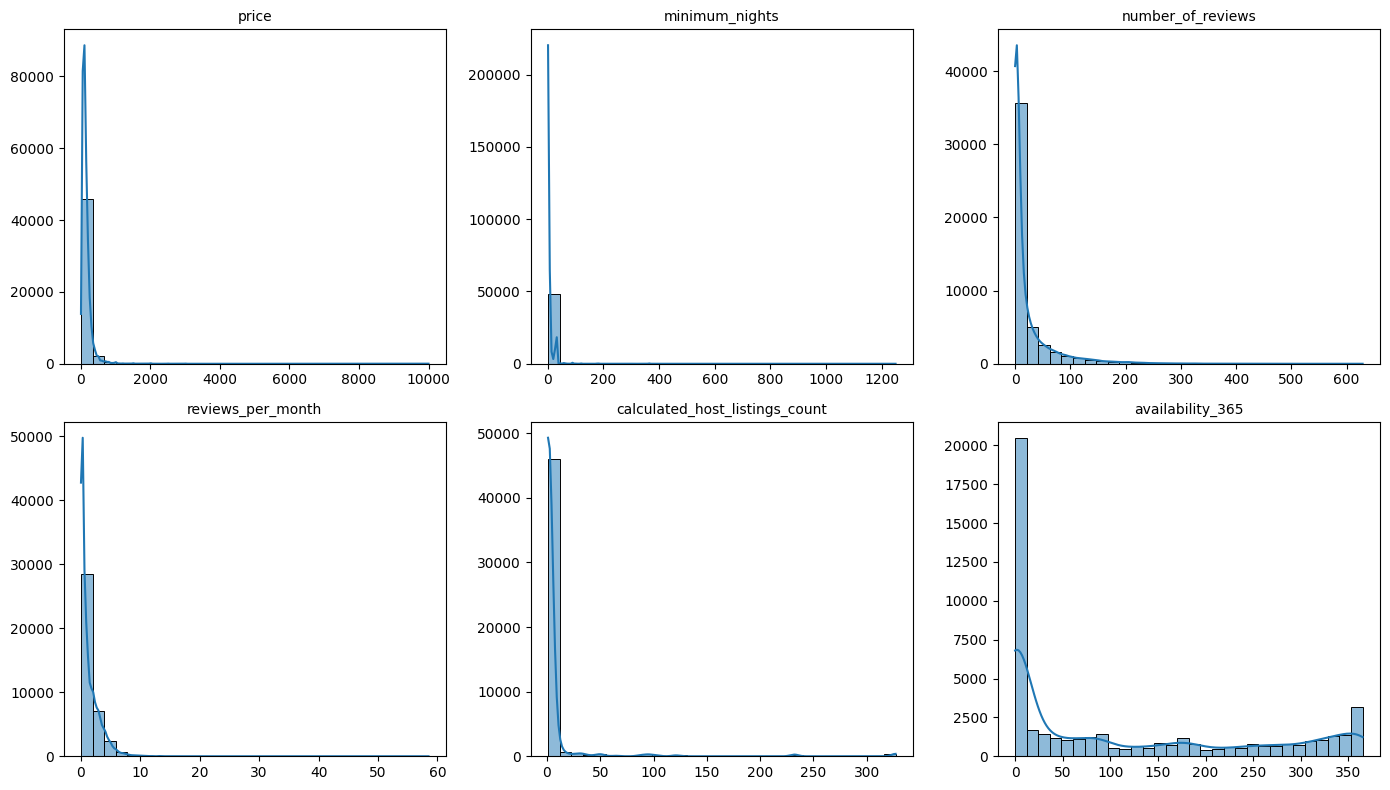

In [17]:
#variables númericas a analizar
variables_num = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

#fila con 6 subgráficos
fig, axis = plt.subplots(2, 3, figsize=(14,8)) #tamaño horizontal ampliado

#recorrer cada variable y eje histplot
for var, ax in zip(variables_num, axis.flatten()):
    sns.histplot(data=airbnb_data, x=var, bins=30,kde=True, ax=ax)
    ax.set_title(f'{var}', fontsize=10)
    ax.set_xlabel('')
    ax.set_ylabel('')




plt.tight_layout()
plt.show()

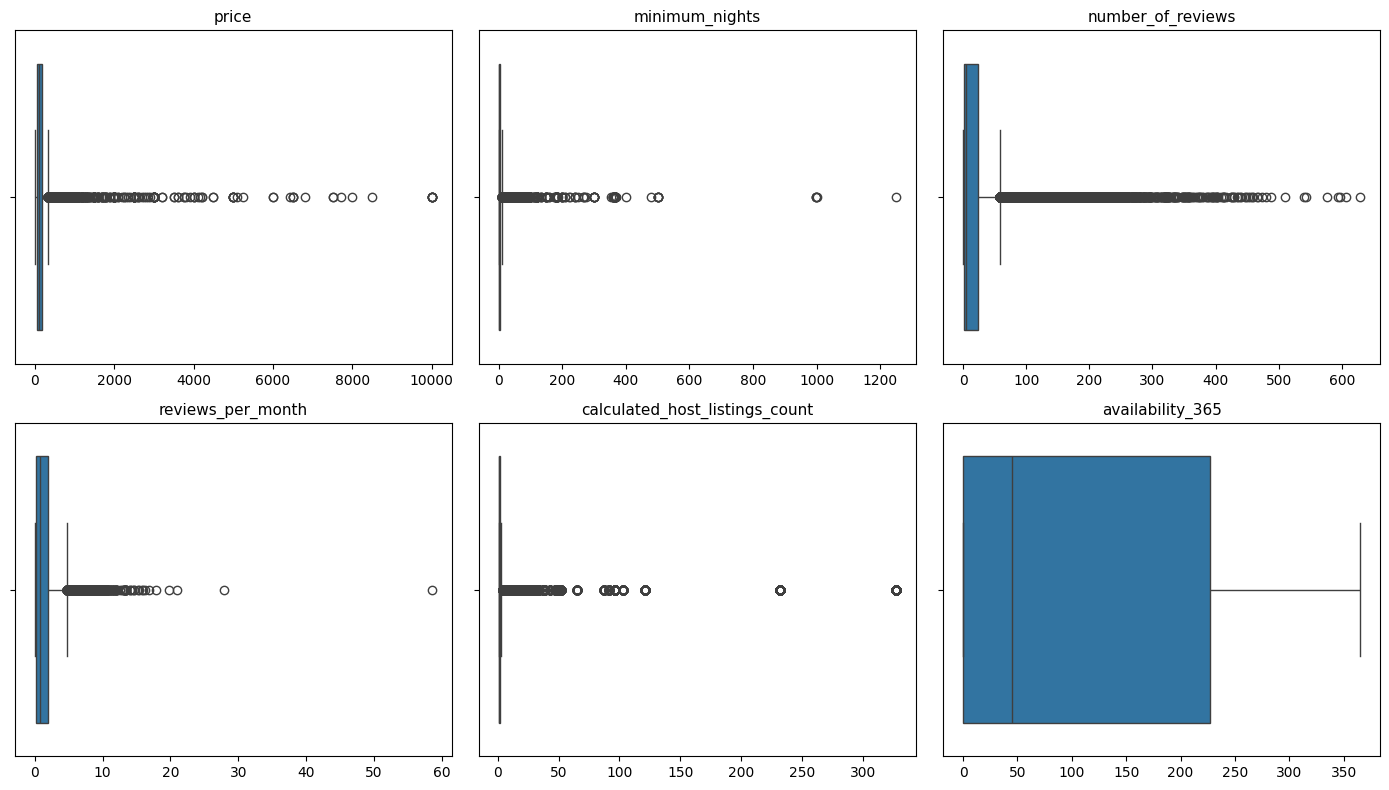

In [18]:
#recorrer cada variable y eje boxpplot
fig, axis = plt.subplots(2, 3, figsize=(14,8))

for var, ax in zip(variables_num, axis.flatten()):
    sns.boxplot(data=airbnb_data, x=var, ax=ax)
    ax.set_title(var, fontsize=11)
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.tight_layout()
plt.show()

>En general podemos ver en estos paneles que presentan muchos valores pequeños y pocos muy grandes. Tenemos "outliers" muy claros que convendrá analizar, especialmente en `price`, `minimum_nights`(absurdo) y `calculated_host_listings_count` (pueden ser empresas dedicadas a la gestión de alojamientos).  


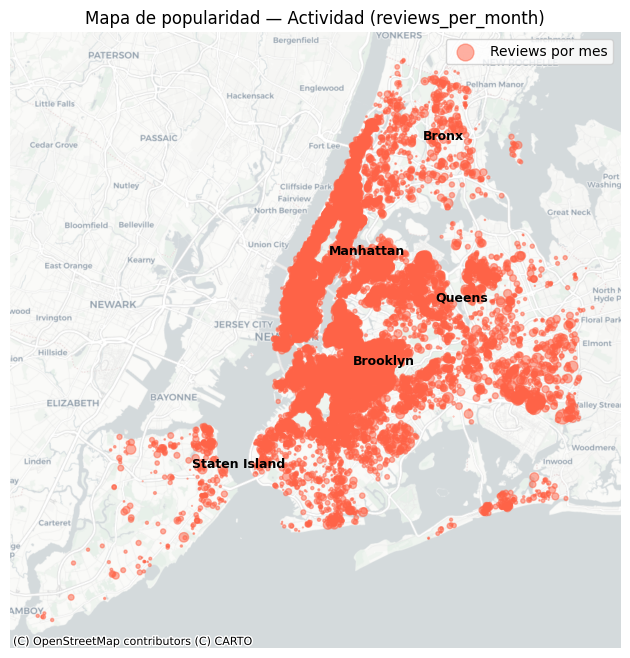

In [19]:
import contextily as ctx
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Convertir DataFrame a GeoDataFrame
gdf = gpd.GeoDataFrame(
    airbnb_data,
    geometry=gpd.points_from_xy(airbnb_data.longitude, airbnb_data.latitude),
    crs="EPSG:4326"
).to_crs(epsg=3857)  # Proyección métrica compatible con contextily

# Calcular centroides de cada grupo de barrio
centroids = gdf.groupby("neighbourhood_group")["geometry"].apply(lambda x: x.union_all().centroid)

# Crear mapa
fig, ax = plt.subplots(figsize=(10, 8))

# Puntos según actividad
gdf.plot(
    ax=ax,
    markersize=gdf["reviews_per_month"] * 5,
    alpha=0.5,
    color="tomato",
    label="Reviews por mes"
)

# Añadir etiquetas de los barrios con un leve desplazamiento
for name, point in centroids.items():
    ax.text(point.x + 1000, point.y + 1000, name, fontsize=9, color="black", weight="bold")

# Añadir mapa base
try:
    ctx.add_basemap(ax, source=ctx.providers.CartoDB.Positron)
except Exception as e:
    print("No se pudo cargar el mapa base:", e)

ax.set_title("Mapa de popularidad — Actividad (reviews_per_month)")
ax.axis("off")
plt.legend()
plt.show()

#Código extraído de chatGPT


>En este gráfico podemos ver un comportamiento normal en ciudades grandes, una alta densidad y movimiento en las areas centricas, como ya se indico en gráficos anteriores, sobre todo en Manhattan y Brooklyn. Con este mapa deseamos mostrar que la localización es un factor clave de popularidad de un alojamiento.  
Llegados a este punto vamos a crear un mapa de correlaciones 

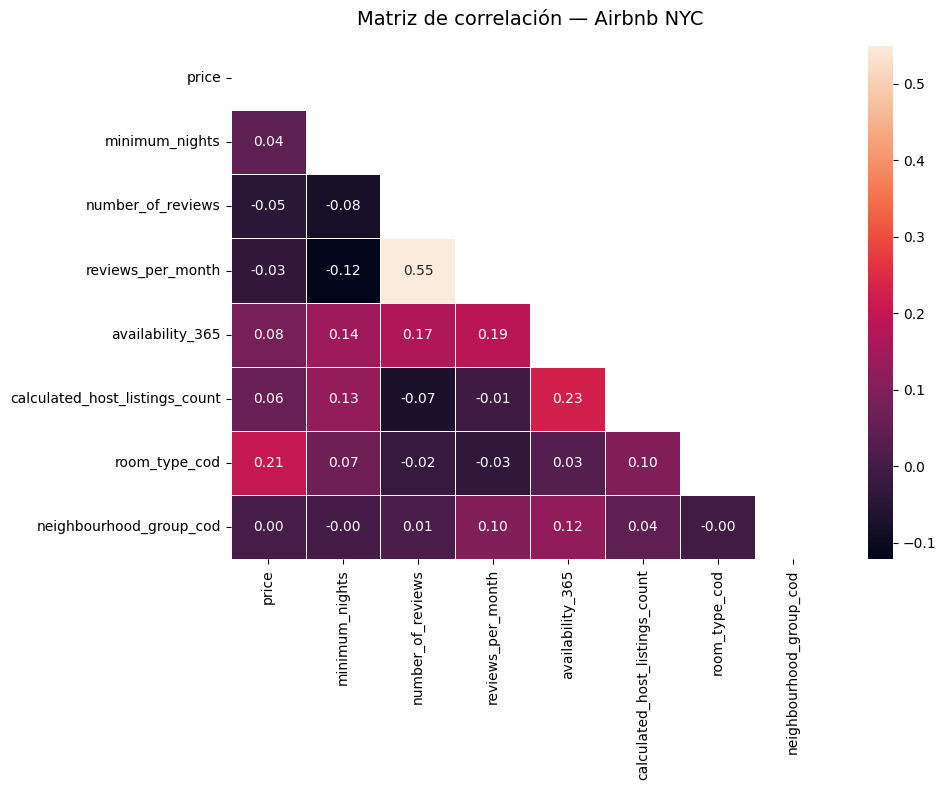

In [20]:
#creamos una cópia de nuestro dataset para realizar el mapa
df_correl = airbnb_data.copy()

# Codificación rápida de variables categóricas (solo para el eda con .factorize())
df_correl['room_type_cod'] = pd.factorize(df_correl['room_type'])[0].astype(int)
df_correl['neighbourhood_group_cod']= pd.factorize(df_correl['neighbourhood_group'])[0].astype(int)

# Selección de variables relevantes
variables_corr = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
                  'availability_365', 'calculated_host_listings_count', 'room_type_cod',
                  'neighbourhood_group_cod']

# Calculamos matriz de correlaciones
corr_matrix = df_correl[variables_corr].apply(pd.to_numeric, errors='coerce').corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
# Gráfico del heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, mask=mask, annot=True, linewidths=0.5, fmt=".2f" )
plt.title("Matriz de correlación — Airbnb NYC", fontsize=14, pad=15)
plt.tight_layout()
plt.show()

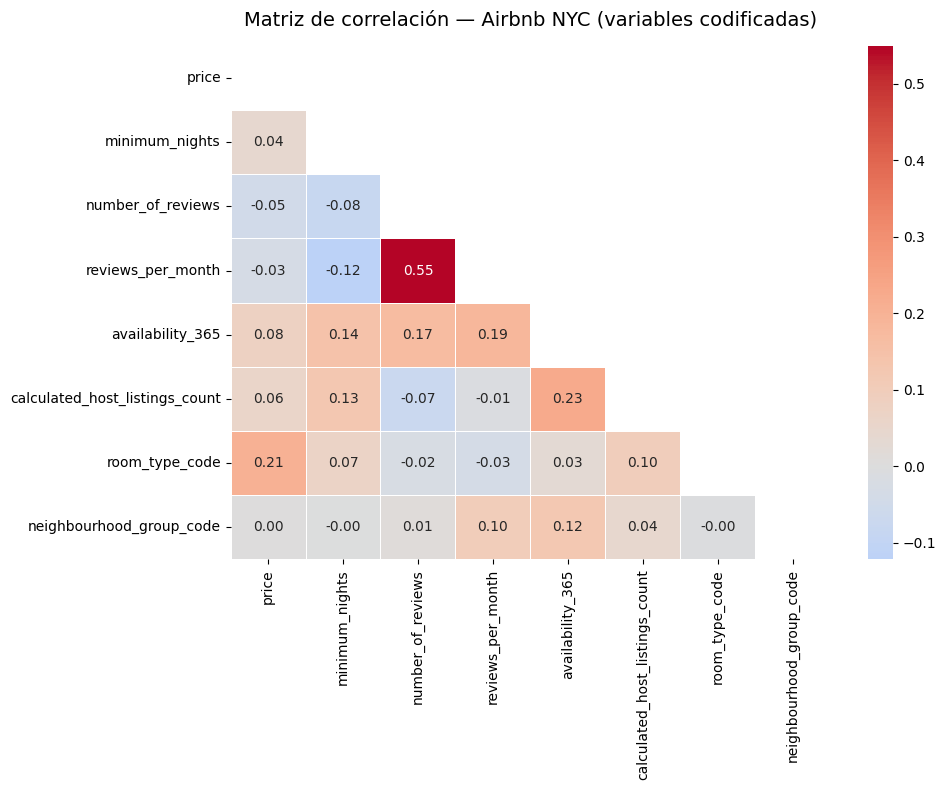

In [21]:
df_correl['room_type_code'] = pd.factorize(df_correl['room_type'])[0].astype(int)
df_correl['neighbourhood_group_code'] = pd.factorize(df_correl['neighbourhood_group'])[0].astype(int)

variables_corr = [
    'price', 
    'minimum_nights', 
    'number_of_reviews', 
    'reviews_per_month',
    'availability_365', 
    'calculated_host_listings_count',
    'room_type_code', 
    'neighbourhood_group_code'
]

corr_matrix = df_correl[variables_corr].apply(pd.to_numeric, errors='coerce').corr()

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix, 
    mask=mask, 
    annot=True, 
    fmt=".2f", 
    linewidths=0.5, 
    cmap="coolwarm", 
    center=0
)
plt.title("Matriz de correlación — Airbnb NYC (variables codificadas)", fontsize=14, pad=15)
plt.tight_layout()
plt.show()